<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Survey_Data_Analysis_v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

#### Renaming it from:
#### Separate_NorthSouth_Data_v12.ipynb
#### to
#### Survey Data Analysis v01.ipnyb

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

v10: Continuation of v9

v11: Continuation of v10. Moving from count to proportions

v12: Continuation of v11

-------------------------------
Renamed as: Survey Data Analysis 01. ipnyb
-------------------------------

v01: No change

v02: Removed code writing output/sample data

v03: Fixing the TODO part for Uni-Var analysis

## Setup

In [64]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [65]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

In [66]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

# Setting Input Files

In [67]:
# With POS File
input_file = '/content/With - Survey Summary Report_ 20201113.xlsx'


In [68]:
# Without POS File
input_file_2 = '/content/Without - Survey Summary Report_ 20201113.xlsx'

# With POS

In [69]:
# reading in input File
#input_file = '/content/WITH - Survey Summary Report_ 20201104.xlsx'
df_master = read_xlsx(input_file, sheet=1)


In [70]:
# printing DF
print(as_tibble(df_master))

# A tibble: 233 x 43
   Date                RespondentId EmployeeCode UserName       BusinessUnit    
   <dttm>                     <dbl>        <dbl> <chr>          <chr>           
 1 2020-10-24 00:00:00         6857        37636 Burhan Ul Haq  Managment       
 2 2020-10-24 00:00:00         6867        37636 Burhan Ul Haq  Managment       
 3 2020-10-24 00:00:00         6868        37636 Burhan Ul Haq  Managment       
 4 2020-10-24 00:00:00         6874        37636 Burhan Ul Haq  Managment       
 5 2020-10-25 00:00:00         6879        30919 Farasat Ullah… Customer Servic…
 6 2020-10-28 00:00:00         6898        37459 Muhammad Saad  Customer Servic…
 7 2020-10-28 00:00:00         6905        37459 Muhammad Saad  Customer Servic…
 8 2020-10-26 00:00:00         6910        32117 Osama Shakeel… Customer Servic…
 9 2020-11-02 00:00:00         6911        36750 Muhammad Khan  Customer Servic…
10 2020-10-28 00:00:00         6917        36814 Abdul Wahab    Customer Servic…
# … wit

In [71]:
## inspect the data
str(df_master)

tibble[,43] [233 × 43] (S3: tbl_df/tbl/data.frame)
 $ Date                                                                                                                      : POSIXct[1:233], format: "2020-10-24" "2020-10-24" ...
 $ RespondentId                                                                                                              : num [1:233] 6857 6867 6868 6874 6879 ...
 $ EmployeeCode                                                                                                              : num [1:233] 37636 37636 37636 37636 30919 ...
 $ UserName                                                                                                                  : chr [1:233] "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" ...
 $ BusinessUnit                                                                                                              : chr [1:233] "Managment" "Managment" "Managment" "Managment" ...
 $ Department                

In [72]:
df_master %>% glimpse()

Rows: 233
Columns: 43
$ Date                                                                                                                         <dttm> …
$ RespondentId                                                                                                                 <dbl> …
$ EmployeeCode                                                                                                                 <dbl> …
$ UserName                                                                                                                     <chr> …
$ BusinessUnit                                                                                                                 <chr> …
$ Department                                                                                                                   <chr> …
$ `Address of the Outlet:`                                                                                                     <chr> …
$ City                          

In [73]:
colnames(df_master)

[1] "Date"                                                                                                                      
 [2] "RespondentId"                                                                                                              
 [3] "EmployeeCode"                                                                                                              
 [4] "UserName"                                                                                                                  
 [5] "BusinessUnit"                                                                                                              
 [6] "Department"                                                                                                                
 [7] "Address of the Outlet:"                                                                                                    
 [8] "City"                                                                                                                      
 [9] "Do you have \"Internet Access\" at your outlet?"                                                                           
[10] "Does your outlet offer â€œDelivery Serviceâ€\u009d?"                                                                       
[11] "For which purposes do you store â€œCustomer Dataâ€\u009d?"                                                                 
[12] "How did you â€œPayâ€\u009d for your current POS?"                                                                          
[13] "How long does it take for a new employee to â€œLearn your POSâ€\u009d? (in number of days):"                               
[14] "How many \"Employees\" do you have in this outlet?"                                                                        
[15] "How much disruption in â€œInternet Serviceâ€\u009d do you face?"                                                           
[16] "How often do you â€œFace Problemsâ€\u009d with your POS?"                                                                  
[17] "If you had to pay for a new POS, which â€œPayment Typeâ€\u009d would you prefer?"                                          
[18] "Is your POS:"                                                                                                              
[19] "Name of the Outlet:"                                                                                                       
[20] "Number of years you have worked with this organization:"                                                                   
[21] "Please choose the â€œNumber of Outletsâ€\u009d:"                                                                           
[22] "Please choose which â€œKind your POSâ€\u009d you have:"                                                                    
[23] "Please provide an amount in PKR you are â€œWilling to Payâ€\u009d, corresponding to last question:"                        
[24] "Please state your â€œPersonal Observationsâ€\u009d which you believe would be interesting to share about this interaction."
[25] "Please take a picture of the outlet, with itâ€™s name visible"                                                             
[26] "Please take a picture of the visiting card"                                                                                
[27] "POS Name: (Name of the POS Software being used. Not the hardware)"                                                         
[28] "POS Provider: (Name of the company from which POS has been purchased)"                                                     
[29] "Region:"                                                                                                                   
[30] "Respondentâ€™s Phone Number:"                                                                                              
[31] "Respondent's Designation:"                                                                     

df_1 hereon

In [74]:
df_1 = df_master

In [75]:
nrow(df_1)

[1] 233

In [76]:
df_1 %>%
  distinct(BusinessUnit)

BusinessUnit
<chr>
Managment
Customer Services North
Customer Services South


In [77]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [78]:
df_1 %>%
 filter(BusinessUnit != 'Managment') -> df_2

df_2 hereon

In [79]:
nrow(df_2)

[1] 229

## Cleaning up the col names

#### removing special characters

In [80]:
#x = df_2
y = colnames(df_2) 
colnames(df_2) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_2)

[1] "Date"                                                                                                           
 [2] "RespondentId"                                                                                                   
 [3] "EmployeeCode"                                                                                                   
 [4] "UserName"                                                                                                       
 [5] "BusinessUnit"                                                                                                   
 [6] "Department"                                                                                                     
 [7] "Address of the Outlet "                                                                                         
 [8] "City"                                                                                                           
 [9] "Do you have Internet Access at your outlet "                                                                    
[10] "Does your outlet offer Delivery Service "                                                                       
[11] "For which purposes do you store Customer Data "                                                                 
[12] "How did you Pay for your current POS "                                                                          
[13] "How long does it take for a new employee to Learn your POS in number of days "                                  
[14] "How many Employees do you have in this outlet "                                                                 
[15] "How much disruption in Internet Service do you face "                                                           
[16] "How often do you Face Problems with your POS "                                                                  
[17] "If you had to pay for a new POS which Payment Type would you prefer "                                           
[18] "Is your POS "                                                                                                   
[19] "Name of the Outlet "                                                                                            
[20] "Number of years you have worked with this organization "                                                        
[21] "Please choose the Number of Outlets "                                                                           
[22] "Please choose which Kind your POS you have "                                                                    
[23] "Please provide an amount in PKR you are Willing to Pay corresponding to last question "                         
[24] "Please state your Personal Observations which you believe would be interesting to share about this interaction "
[25] "Please take a picture of the outlet with it s name visible"                                                     
[26] "Please take a picture of the visiting card"                                                                     
[27] "POS Name Name of the POS Software being used Not the hardware "                                                 
[28] "POS Provider Name of the company from which POS has been purchased "                                            
[29] "Region "                                                                                                        
[30] "Respondent s Phone Number "                                                                                     
[31] "Respondent s Designation "                                                                                      
[32] "Respondent s name "                                                                                             
[33] "What Language is your POS in "                                                                                  
[34] "What are the Most Important Features in a POS You may choose multipl

In [81]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [82]:
df_2 = 
  df_2 %>% clean_names()

In [83]:
colnames(df_2)

[1] "date"                                                                                                          
 [2] "respondent_id"                                                                                                 
 [3] "employee_code"                                                                                                 
 [4] "user_name"                                                                                                     
 [5] "business_unit"                                                                                                 
 [6] "department"                                                                                                    
 [7] "address_of_the_outlet"                                                                                         
 [8] "city"                                                                                                          
 [9] "do_you_have_internet_access_at_your_outlet"                                                                    
[10] "does_your_outlet_offer_delivery_service"                                                                       
[11] "for_which_purposes_do_you_store_customer_data"                                                                 
[12] "how_did_you_pay_for_your_current_pos"                                                                          
[13] "how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days"                                  
[14] "how_many_employees_do_you_have_in_this_outlet"                                                                 
[15] "how_much_disruption_in_internet_service_do_you_face"                                                           
[16] "how_often_do_you_face_problems_with_your_pos"                                                                  
[17] "if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer"                                           
[18] "is_your_pos"                                                                                                   
[19] "name_of_the_outlet"                                                                                            
[20] "number_of_years_you_have_worked_with_this_organization"                                                        
[21] "please_choose_the_number_of_outlets"                                                                           
[22] "please_choose_which_kind_your_pos_you_have"                                                                    
[23] "please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question"                         
[24] "please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction"
[25] "please_take_a_picture_of_the_outlet_with_it_s_name_visible"                                                    
[26] "please_take_a_picture_of_the_visiting_card"                                                                    
[27] "pos_name_name_of_the_pos_software_being_used_not_the_hardware"                                                 
[28] "pos_provider_name_of_the_company_from_which_pos_has_been_purchased"                                            
[29] "region"                                                                                                        
[30] "respondent_s_phone_number"                                                                                     
[31] "respondent_s_designation"                                                                                      
[32] "respondent_s_name"                                                                                             
[33] "what_language_is_your_pos_in"                                                                                  
[34] "what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options"                       

#### column mapping

In [84]:
df_3 = df_2 %>% rename(
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_PAY_FOR_OLD_POS = 'how_did_you_pay_for_your_current_pos',
ORG_EMP_TRAINING =  'how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_OLD_POS_PROBLEMS = 'how_often_do_you_face_problems_with_your_pos',
ORG_NEW_POS_PAYMENT_PREF ='if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_POS_TYPE = 'is_your_pos',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_worked_with_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_OLD_POS_KIND = 'please_choose_which_kind_your_pos_you_have',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_POS_NAME = 'pos_name_name_of_the_pos_software_being_used_not_the_hardware',
ORG_POS_PROVIDER = 'pos_provider_name_of_the_company_from_which_pos_has_been_purchased',
SB_REGION = 'region',
RESP_PHONE = 'respondent_s_phone_number',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
ORG_OLD_POS_LANG = 'what_language_is_your_pos_in',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_business_are_you',
ORG_OLD_POS_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_through_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_DEVICES = 'which_device_s_do_you_use_for_accessing_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_PROVIDER_PAYMENT_METHOD = 'which_method_do_you_use_for_paying_your_pos_vendor',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_OLD_POS_URDU_FEATURES = 'which_of_the_following_features_in_your_pos_are_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_REPLACE_POS = 
'which_of_the_following_can_be_a_reason_to_replace_your_pos_you_may_choose_multiple_options',
ORG_WILLINGNESS_DEMO = 
'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT =
'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card'
)

df_3 hereon

### Data Cleanup

Removing entries where radio button question has multiple options

Fixing ORG_POS_TYPE

In [85]:
df_3 %>%
distinct(ORG_POS_TYPE)

ORG_POS_TYPE
<chr>
Custom-Built (you got it made as per your requirements)
Ready-Made
"Custom-Built (you got it made as per your requirements), Ready-Made"


In [86]:
df_3 %>% 
filter(ORG_POS_TYPE != 'Custom-Built (you got it made as per your requirements), Ready-Made') -> df_3

In [87]:
# replacing "Custom-Built (you got it made as per your requirements)" to "Custom-Built"
df_3 %>%
mutate(ORG_POS_TYPE=replace(ORG_POS_TYPE, ORG_POS_TYPE=='Custom-Built (you got it made as per your requirements)', 'Custom-Built')) %>%
     as.data.frame() -> df_3

Fixing "ORG_OLD_POS_KIND"

In [88]:
str(df_3$ORG_OLD_POS_KIND)

 chr [1:228] "Stand-Alone: does NOT require Internet Connection" ...


In [89]:
#df_3 %>%
#mutate(ORG_OLD_POS_KIND=replace(ORG_OLD_POS_KIND,ORG_OLD_POS_KIND=='Stand−Alone: does NOT require Internet Connection','Stand−Alone')) %>%
#as.data.frame() -> df_3

recode(df_3$ORG_OLD_POS_KIND, 'Stand−Alone: does NOT require Internet Connection' = 'Stand−Alone')


[1] "Stand-Alone: does NOT require Internet Connection"
  [2] "Stand-Alone: does NOT require Internet Connection"
  [3] "Web-Based: requires Internet Connection to work"  
  [4] "Stand-Alone: does NOT require Internet Connection"
  [5] "Web-Based: requires Internet Connection to work"  
  [6] "Web-Based: requires Internet Connection to work"  
  [7] "Web-Based: requires Internet Connection to work"  
  [8] "Web-Based: requires Internet Connection to work"  
  [9] "Web-Based: requires Internet Connection to work"  
 [10] "Web-Based: requires Internet Connection to work"  
 [11] "Web-Based: requires Internet Connection to work"  
 [12] "Web-Based: requires Internet Connection to work"  
 [13] "Web-Based: requires Internet Connection to work"  
 [14] "Web-Based: requires Internet Connection to work"  
 [15] "Web-Based: requires Internet Connection to work"  
 [16] "Stand-Alone: does NOT require Internet Connection"
 [17] "Web-Based: requires Internet Connection to work"  
 [18] "Stand-Alone: does NOT require Internet Connection"
 [19] "Web-Based: requires Internet Connection to work"  
 [20] "Stand-Alone: does NOT require Internet Connection"
 [21] "Web-Based: requires Internet Connection to work"  
 [22] "Stand-Alone: does NOT require Internet Connection"
 [23] "Stand-Alone: does NOT require Internet Connection"
 [24] "Web-Based: requires Internet Connection to work"  
 [25] "Web-Based: requires Internet Connection to work"  
 [26] "Stand-Alone: does NOT require Internet Connection"
 [27] "Stand-Alone: does NOT require Internet Connection"
 [28] "Web-Based: requires Internet Connection to work"  
 [29] "Web-Based: requires Internet Connection to work"  
 [30] "Web-Based: requires Internet Connection to work"  
 [31] "Web-Based: requires Internet Connection to work"  
 [32] "Stand-Alone: does NOT require Internet Connection"
 [33] "Stand-Alone: does NOT require Internet Connection"
 [34] "Web-Based: requires Internet Connection to work"  
 [35] "Web-Based: requires Internet Connection to work"  
 [36] "Web-Based: requires Internet Connection to work"  
 [37] "Web-Based: requires Internet Connection to work"  
 [38] "Web-Based: requires Internet Connection to work"  
 [39] "Web-Based: requires Internet Connection to work"  
 [40] "Web-Based: requires Internet Connection to work"  
 [41] "Web-Based: requires Internet Connection to work"  
 [42] "Web-Based: requires Internet Connection to work"  
 [43] "Web-Based: requires Internet Connection to work"  
 [44] "Web-Based: requires Internet Connection to work"  
 [45] "Web-Based: requires Internet Connection to work"  
 [46] "Web-Based: requires Internet Connection to work"  
 [47] "Web-Based: requires Internet Connection to work"  
 [48] "Web-Based: requires Internet Connection to work"  
 [49] "Web-Based: requires Internet Connection to work"  
 [50] "Web-Based: requires Internet Connection to work"  
 [51] "Web-Based: requires Internet Connection to work"  
 [52] "Web-Based: requires Internet Connection to work"  
 [53] "Web-Based: requires Internet Connection to work"  
 [54] "Web-Based: requires Internet Connection to work"  
 [55] "Web-Based: requires Internet Connection to work"  
 [56] "Web-Based: requires Internet Connection to work"  
 [57] "Web-Based: requires Internet Connection to work"  
 [58] "Web-Based: requires Internet Connection to work"  
 [59] "Web-Based: requires Internet Connection to work"  
 [60] "Web-Based: requires Internet Connection to work"  
 [61] "Stand-Alone: does NOT require Internet Connection"
 [62] "Stand-Alone: does NOT require Internet Connection"
 [63] "Web-Based: requires Internet Connection to work"  
 [64] "Web-Based: requires Internet Connection to work"  
 [65] "Web-Based: requires Internet Connection to work"  
 [66] "Web-Based: requires Internet Connection to work"  
 [67] "Web-Based: requires Internet Connection to work"  
 [68] "Web-Based: requires Internet Connection to work"  
 [69] "Web-Based: requires Internet Connection to work"  


In [90]:
df_3 %>%
mutate(ORG_OLD_POS_KIND=replace(ORG_OLD_POS_KIND,ORG_OLD_POS_KIND=='Web−Based: requires Internet Connection to work','Web−Based')) %>%
as.data.frame() -> df_3


In [91]:
df_3 %>%
distinct(ORG_OLD_POS_KIND)

ORG_OLD_POS_KIND
<chr>
Stand-Alone: does NOT require Internet Connection
Web-Based: requires Internet Connection to work


Fixing ORG_POS_FEATURES

In [92]:

df_POS_FEATURES = data.frame(table(unlist(strsplit(tolower(df_3$ORG_POS_FEATURES), " "))))

In [93]:
str(df_POS_FEATURES)

'data.frame':	50 obs. of  2 variables:
 $ Var1: Factor w/ 50 levels ",","(able","(attendance,",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  4 32 16 227 52 30 7 5 506 59 ...


In [95]:
df_POS_FEATURES %>% glimpse()

Rows: 50
Columns: 2
$ Var1 <fct> ",", "(able", "(attendance,", "(balance", "(get", "(manage", "(of…
$ Freq <int> 4, 32, 16, 227, 52, 30, 7, 5, 506, 59, 30, 454, 149, 78, 14, 227,…


In [97]:
t4 <- df_POS_FEATURES %>%
  tabyl(Var1) %>%
  #adorn_percentages("row") %>%
  adorn_pct_formatting(affix_sign = FALSE)

In [98]:
df_POS_FEATURES_2 <- df_POS_FEATURES %>%
  #count(Var1) %>%
  # count creates a column called 'n'
  mutate(percent = round(Freq / sum(Freq) * 100,2))

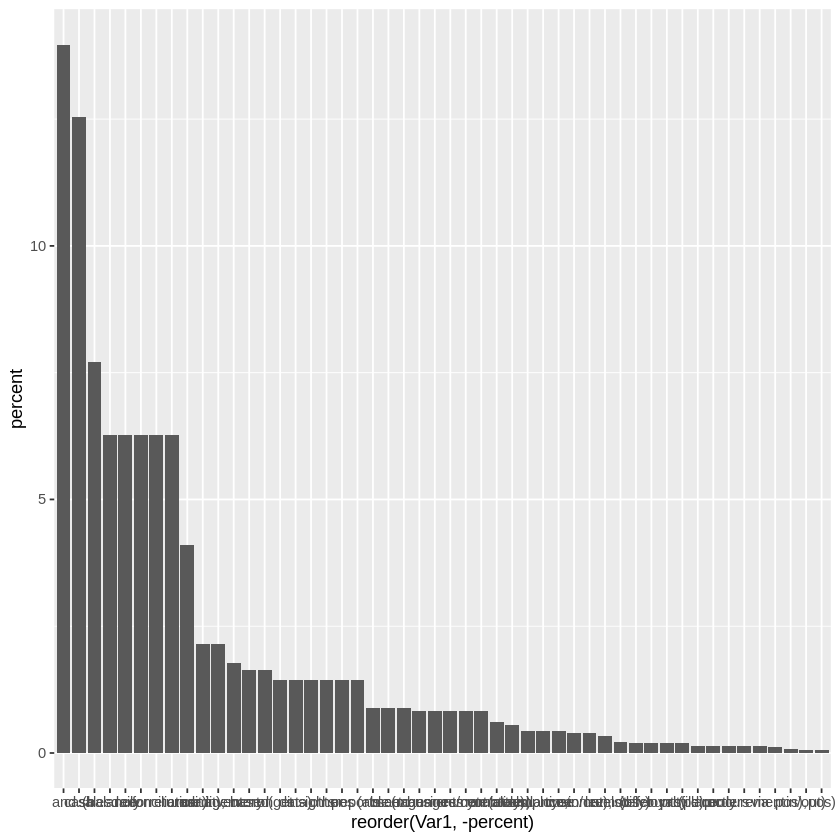

In [99]:
g_no <- df_POS_FEATURES_2 %>%
  ggplot(aes(x=reorder(Var1,-percent),y=percent)) + 
  geom_bar(stat="identity")

g_no

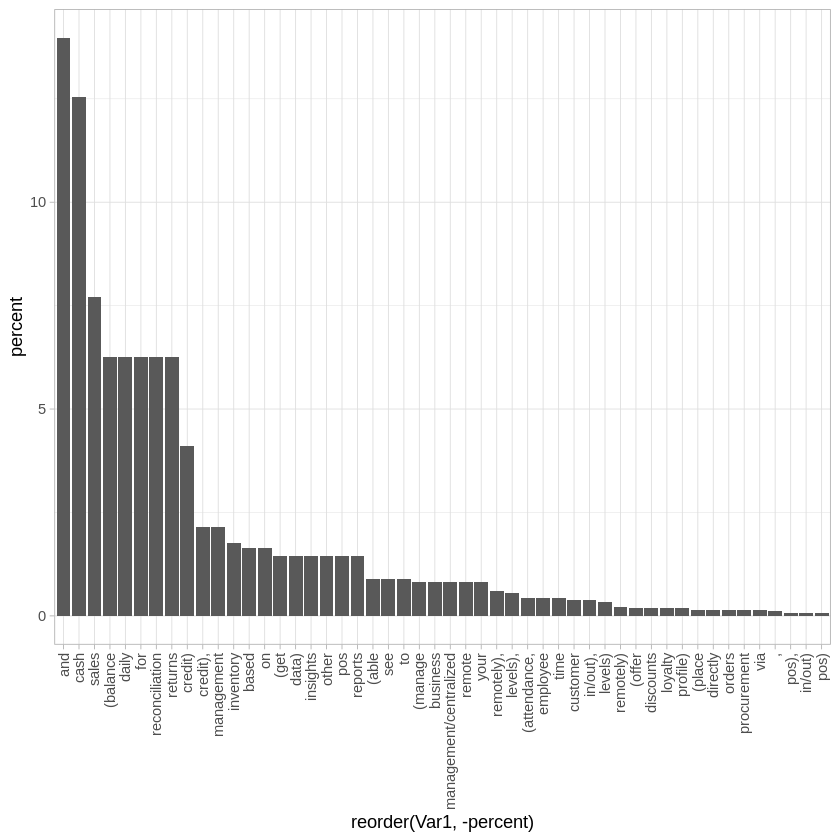

In [100]:
g121 <- g_no + scale_fill_brewer(palette = "Set2") 
g121 <- g121 + theme_light()
g121 <- g121 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g121

### Exp Graphs

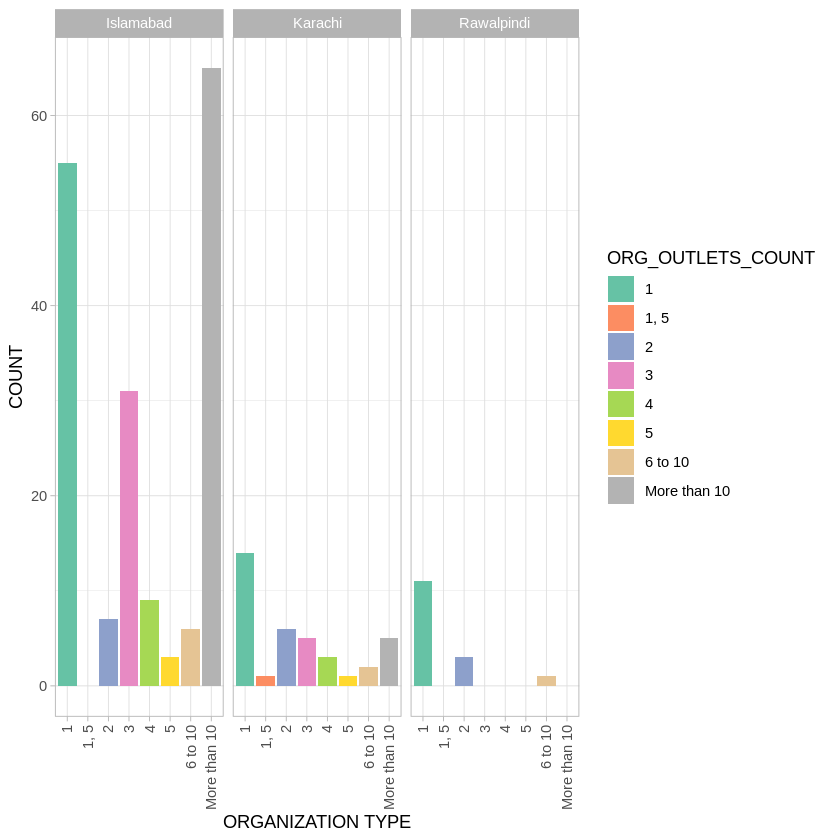

In [101]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_OUTLETS_COUNT)) +
    geom_bar(aes(fill = ORG_OUTLETS_COUNT), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

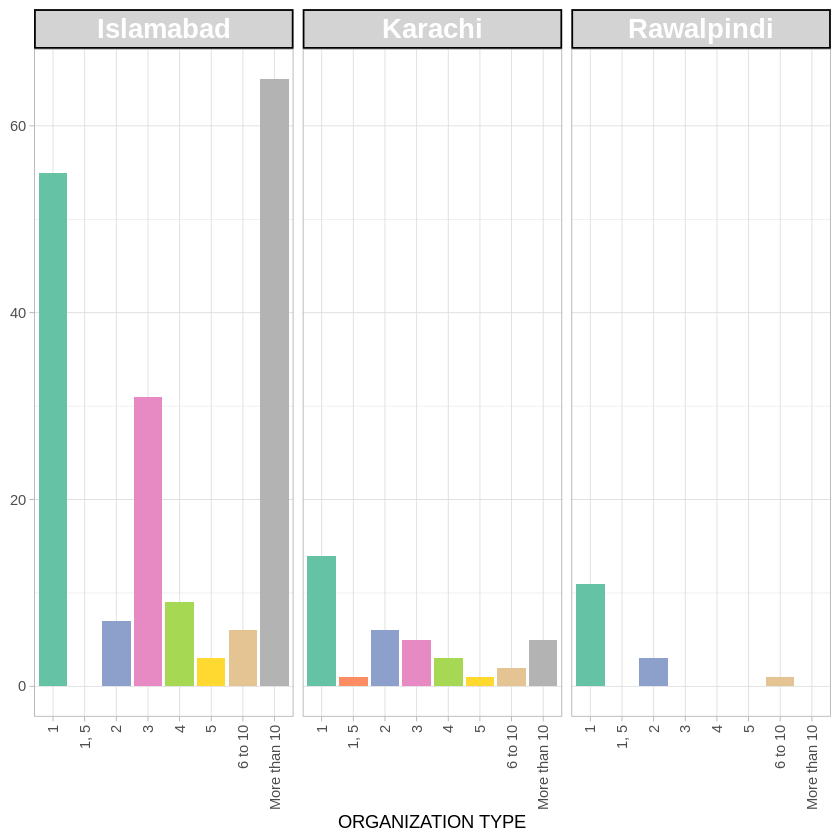

In [102]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

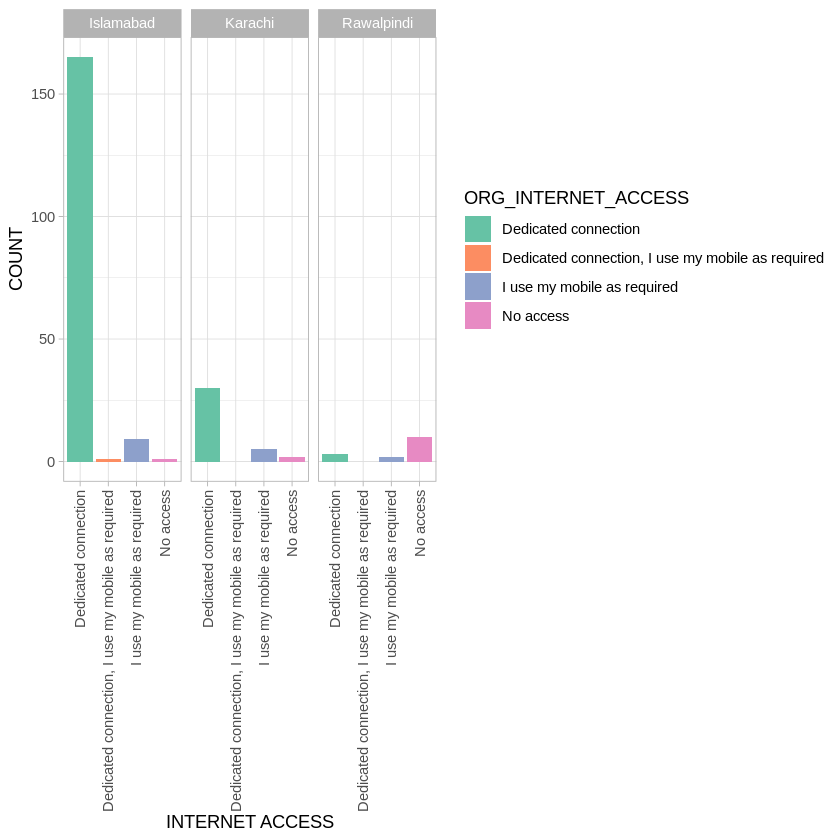

In [103]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_INTERNET_ACCESS)) +
    geom_bar(aes(fill = ORG_INTERNET_ACCESS), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "INTERNET ACCESS", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

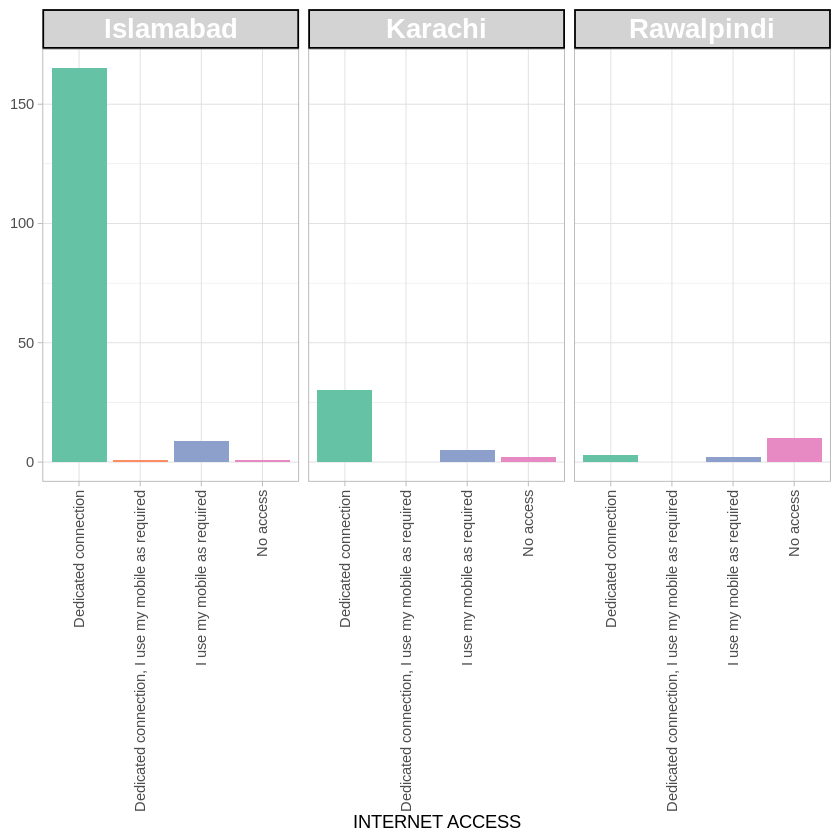

In [104]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

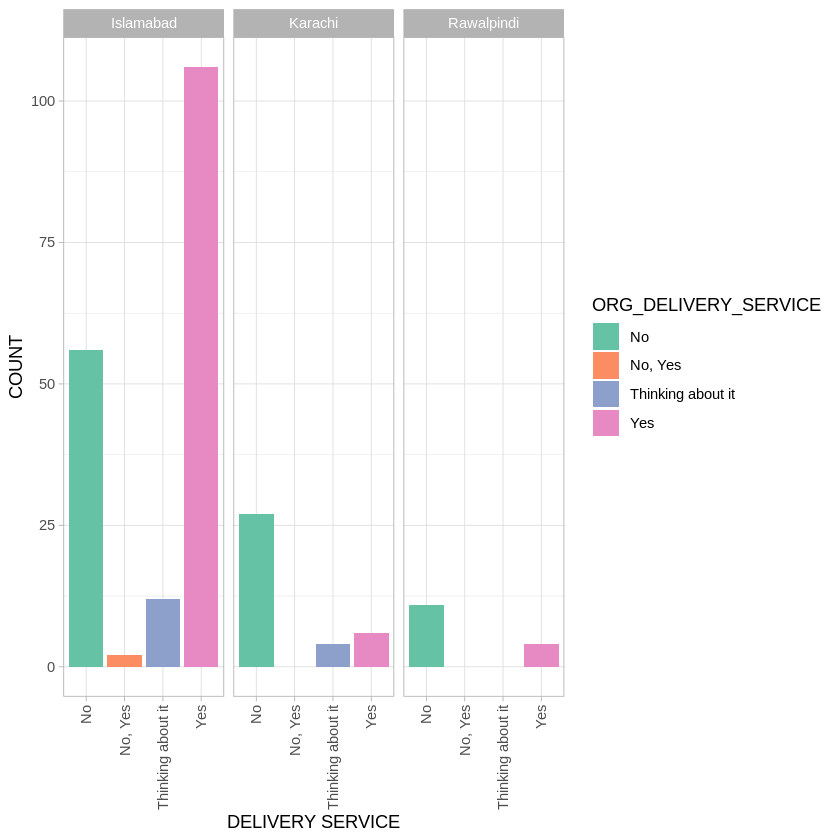

In [105]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_DELIVERY_SERVICE)) +
    geom_bar(aes(fill = ORG_DELIVERY_SERVICE), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "DELIVERY SERVICE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

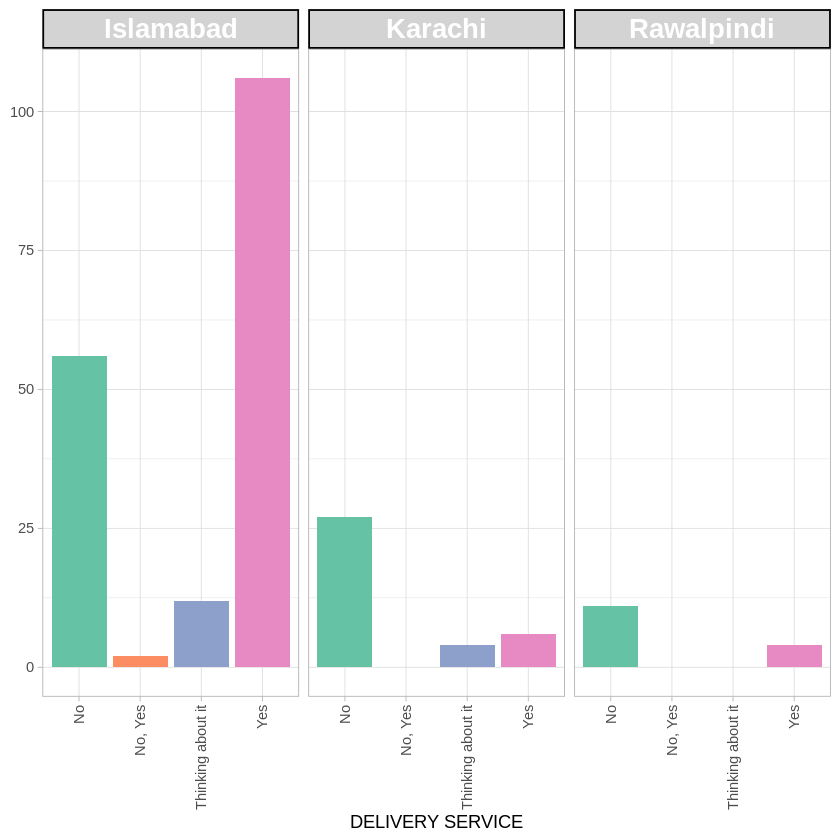

In [106]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

In [107]:
# TODO: compile counts of ORG_CUSTOMER_DATA

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


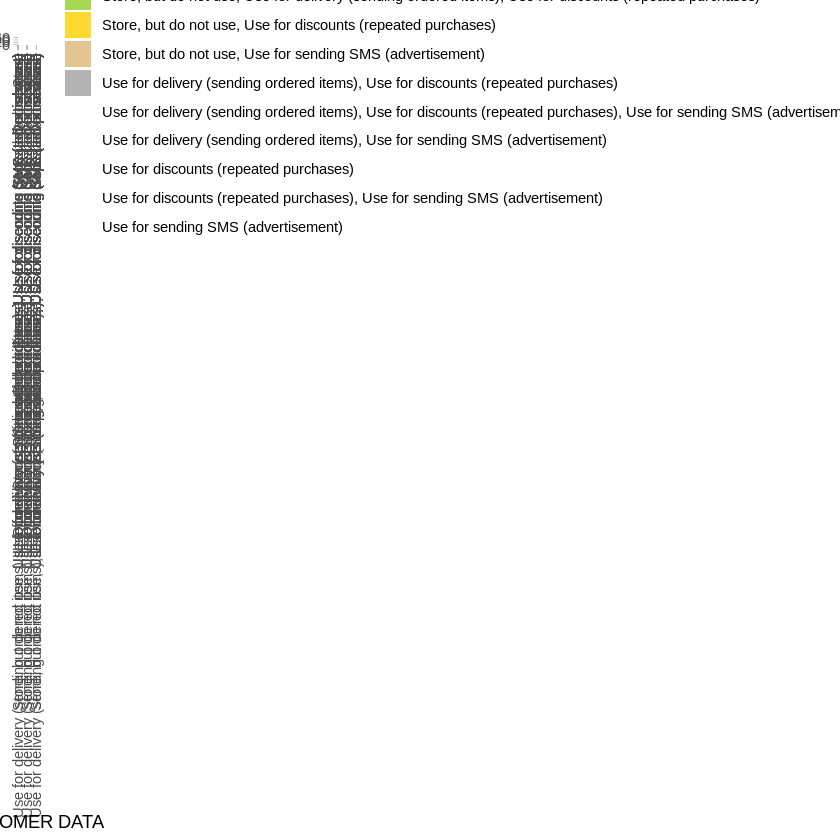

In [108]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_CUSTOMER_DATA)) +
    geom_bar(aes(fill = ORG_CUSTOMER_DATA), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "CUSTOMER DATA", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

### Exp Graphs Via PURRR

In [109]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [110]:
# list of variables to plot
colnames(df_3)

[1] "date"                                "respondent_id"                      
 [3] "employee_code"                       "user_name"                          
 [5] "SB_BU"                               "SB_DEPT"                            
 [7] "ORG_ADDRESS"                         "ORG_CITY"                           
 [9] "ORG_INTERNET_ACCESS"                 "ORG_DELIVERY_SERVICE"               
[11] "ORG_CUSTOMER_DATA"                   "ORG_PAY_FOR_OLD_POS"                
[13] "ORG_EMP_TRAINING"                    "ORG_EMP_COUNT"                      
[15] "ORG_INTERNET_DISRUPTION"             "ORG_OLD_POS_PROBLEMS"               
[17] "ORG_NEW_POS_PAYMENT_PREF"            "ORG_POS_TYPE"                       
[19] "ORG_NAME"                            "ORG_RESP_TENURE"                    
[21] "ORG_OUTLETS_COUNT"                   "ORG_OLD_POS_KIND"                   
[23] "ORG_WILLINGNESS_TO_PAY_AMOUNT"       "SB_OBSERVATION"                     
[25] "ORG_PICTURE_LINK"                    "ORG_VISITING_CARD"                  
[27] "ORG_POS_NAME"                        "ORG_POS_PROVIDER"                   
[29] "SB_REGION"                           "RESP_PHONE"                         
[31] "RESP_DESIGNATION"                    "RESP_NAME"                          
[33] "ORG_OLD_POS_LANG"                    "ORG_POS_FEATURES"                   
[35] "ORG_TYPE"                            "ORG_OLD_POS_PAYMENT_OPTIONS"        
[37] "ORG_OLD_POS_DEVICES"                 "ORG_OLD_POS_PROVIDER_PAYMENT_METHOD"
[39] "ORG_DISCOUNTS_OFFERED"               "ORG_OLD_POS_URDU_FEATURES"          
[41] "ORG_REASON_TO_REPLACE_POS"           "ORG_WILLINGNESS_DEMO"               
[43] "ORG_WILLINGNESS_FUTURE_CONTACT"

In [111]:
uni_var = c('ORG_OUTLETS_COUNT','ORG_EMP_COUNT','ORG_DELIVERY_SERVICE',
'ORG_INTERNET_ACCESS','ORG_INTERNET_DISRUPTION','ORG_POS_TYPE','ORG_OLD_POS_KIND',
'ORG_OLD_POS_LANG','ORG_OLD_POS_PROBLEMS',
'ORG_PAY_FOR_OLD_POS', 'ORG_WILLINGNESS_DEMO',
'ORG_WILLINGNESS_FUTURE_CONTACT','ORG_EMP_TRAINING',
'ORG_NEW_POS_PAYMENT_PREF')
uni_var = set_names(uni_var)
uni_var

ORG_OUTLETS_COUNT                    ORG_EMP_COUNT 
             "ORG_OUTLETS_COUNT"                  "ORG_EMP_COUNT" 
            ORG_DELIVERY_SERVICE              ORG_INTERNET_ACCESS 
          "ORG_DELIVERY_SERVICE"            "ORG_INTERNET_ACCESS" 
         ORG_INTERNET_DISRUPTION                     ORG_POS_TYPE 
       "ORG_INTERNET_DISRUPTION"                   "ORG_POS_TYPE" 
                ORG_OLD_POS_KIND                 ORG_OLD_POS_LANG 
              "ORG_OLD_POS_KIND"               "ORG_OLD_POS_LANG" 
            ORG_OLD_POS_PROBLEMS              ORG_PAY_FOR_OLD_POS 
          "ORG_OLD_POS_PROBLEMS"            "ORG_PAY_FOR_OLD_POS" 
            ORG_WILLINGNESS_DEMO   ORG_WILLINGNESS_FUTURE_CONTACT 
          "ORG_WILLINGNESS_DEMO" "ORG_WILLINGNESS_FUTURE_CONTACT" 
                ORG_EMP_TRAINING         ORG_NEW_POS_PAYMENT_PREF 
              "ORG_EMP_TRAINING"       "ORG_NEW_POS_PAYMENT_PREF"

TODO

In [112]:
# variables to fix (multiple choice options)
# ORG_TYPE
# ORG_DISCOUNTS_OFFERED
# ORG_CUSTOMER_DATA
# ORG_POS_FEATURES
# ORG_OLD_POS_PAYMENT_OPTIONS
# ORG_OLD_POS_DEVICES
# ORG_OLD_POS_URDU_FEATURES
# ORG_REASON_TO_REPLACE_POS
# ORG_WILLINGNESS_TO_PAY_AMOUNT
# ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

#### Plotting WorkHorse

In [114]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

In [115]:
#bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

#### Plotting WorkHorse (Proportions)

In [116]:
bar_prop_fun = function(x, y) {
  
    ggplot(df_3, aes(x = .data[[x]], group = .data[[y]]) ) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..,accuracy=0.1),
                  y= ..prop.. ), stat= "count", 
                  vjust = -.5, size=2 ) +
    facet_grid(~ .data[[y]]) +
    scale_y_continuous(labels = scales::percent) +

    # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none")
}

In [117]:
#bar_prop_fun("ORG_PAY_FOR_OLD_POS","ORG_CITY")

In [118]:

# Now using MAP, fixing facet variable to ORG_CITY
#uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )
uni_plots = map(uni_var, ~bar_prop_fun(.x, "ORG_CITY") )

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


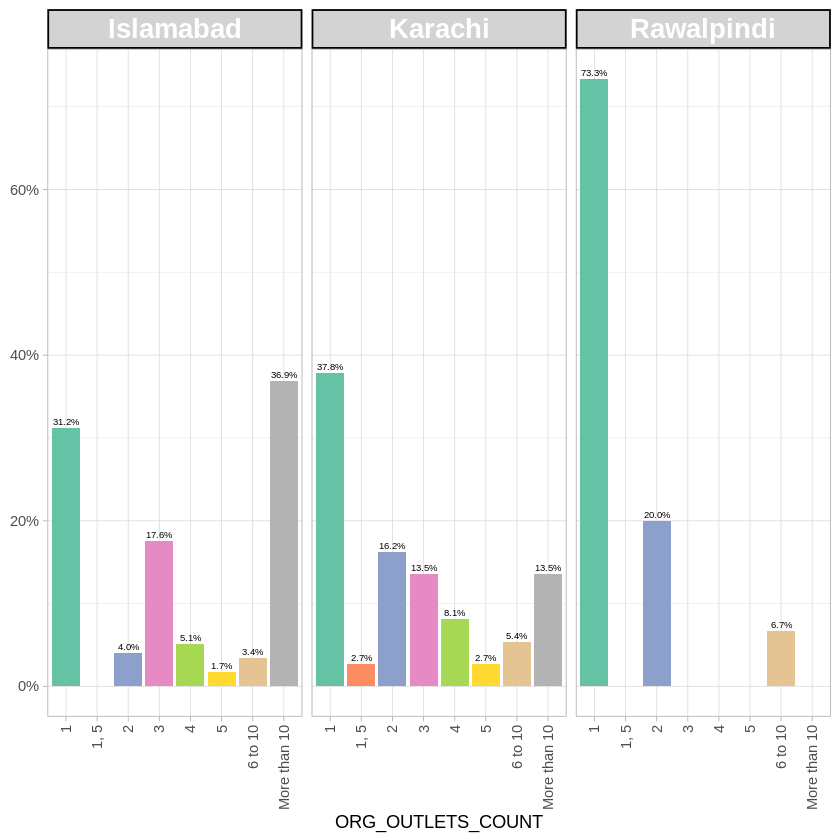

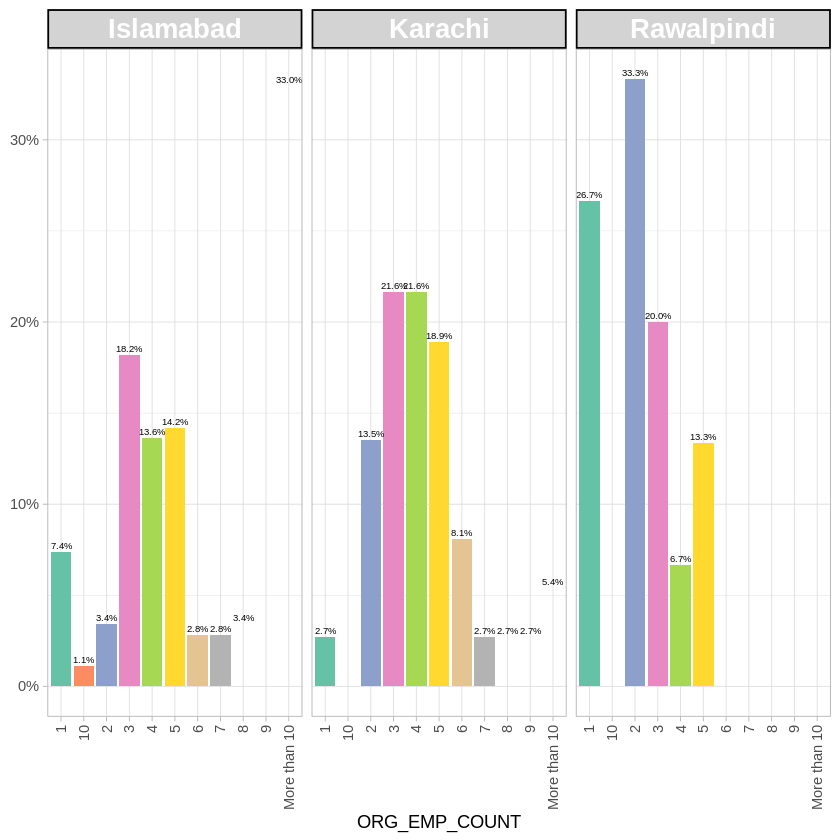

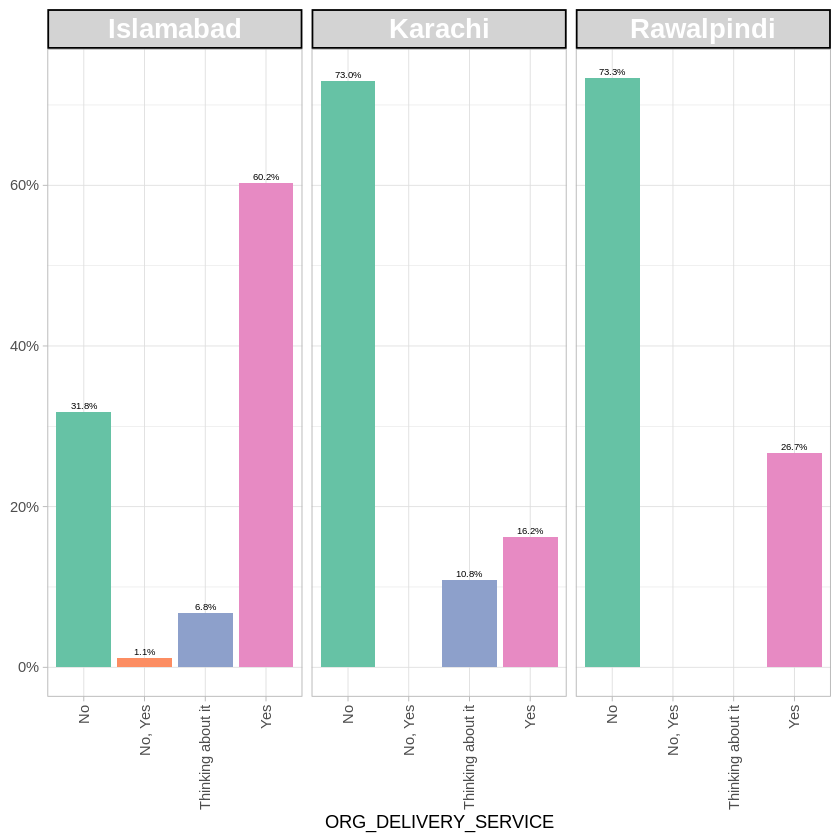

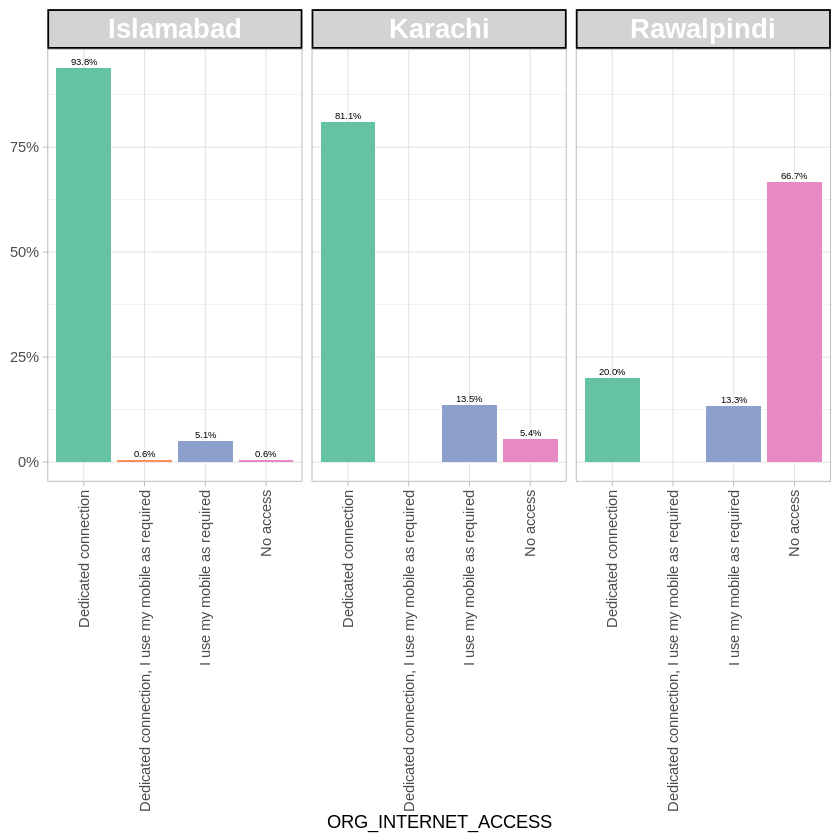

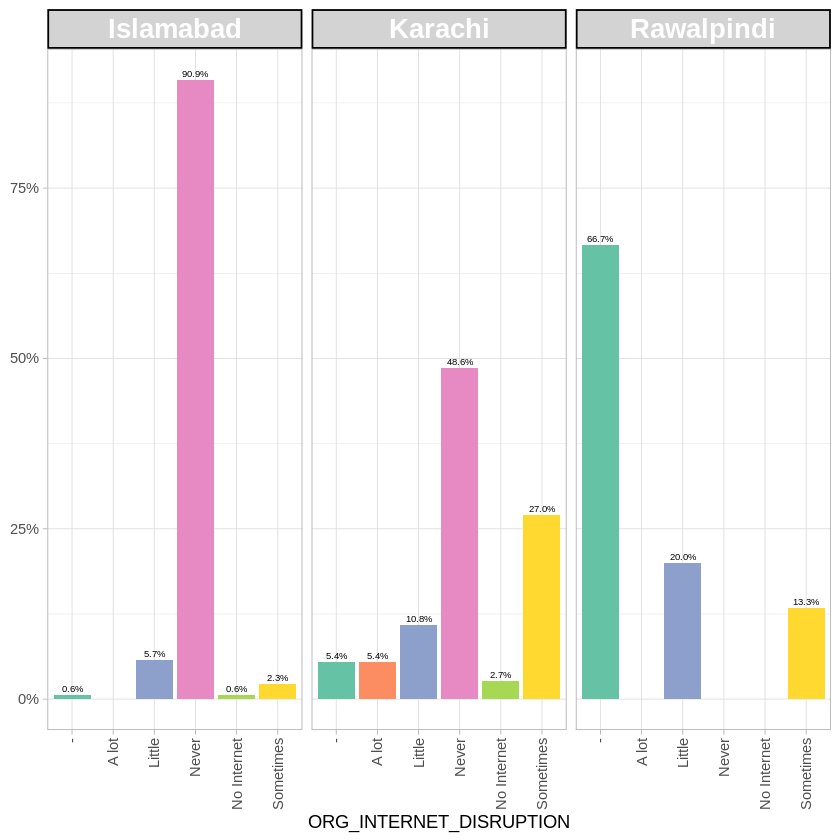

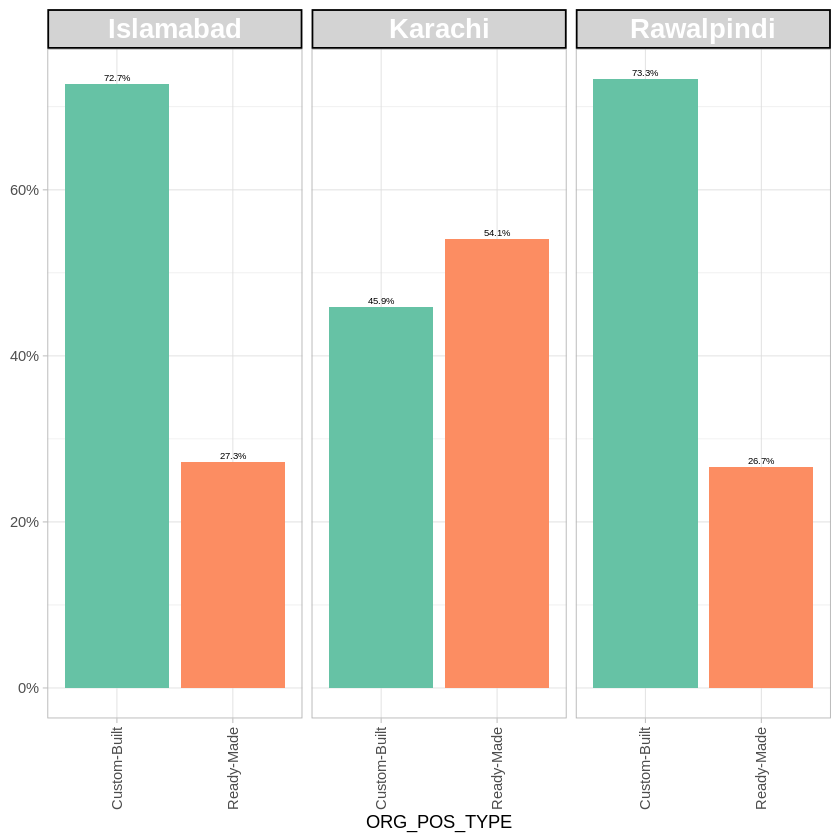

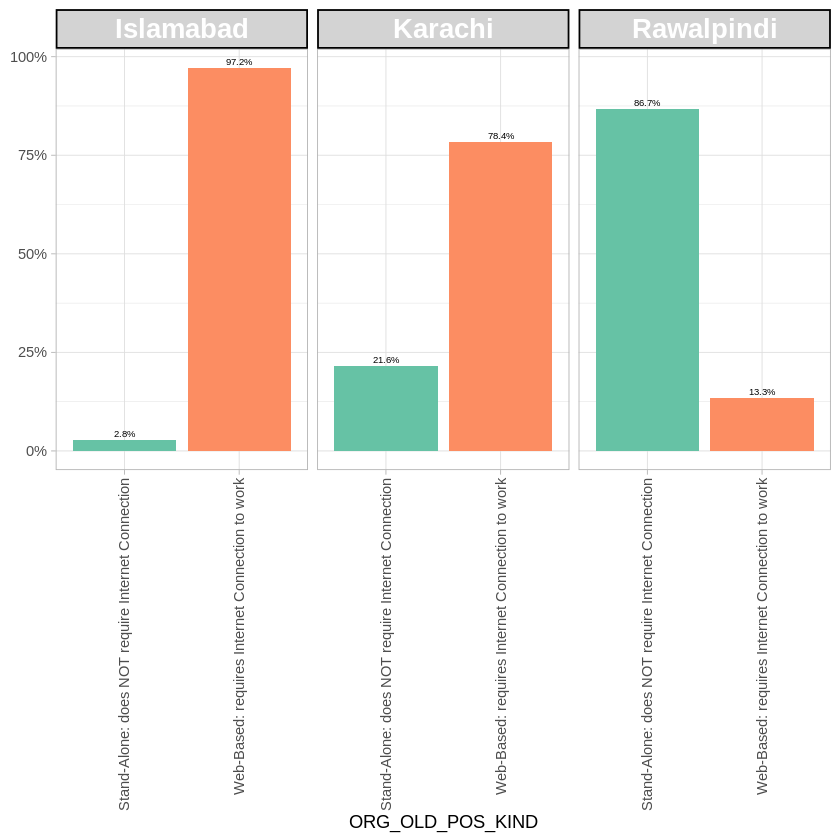

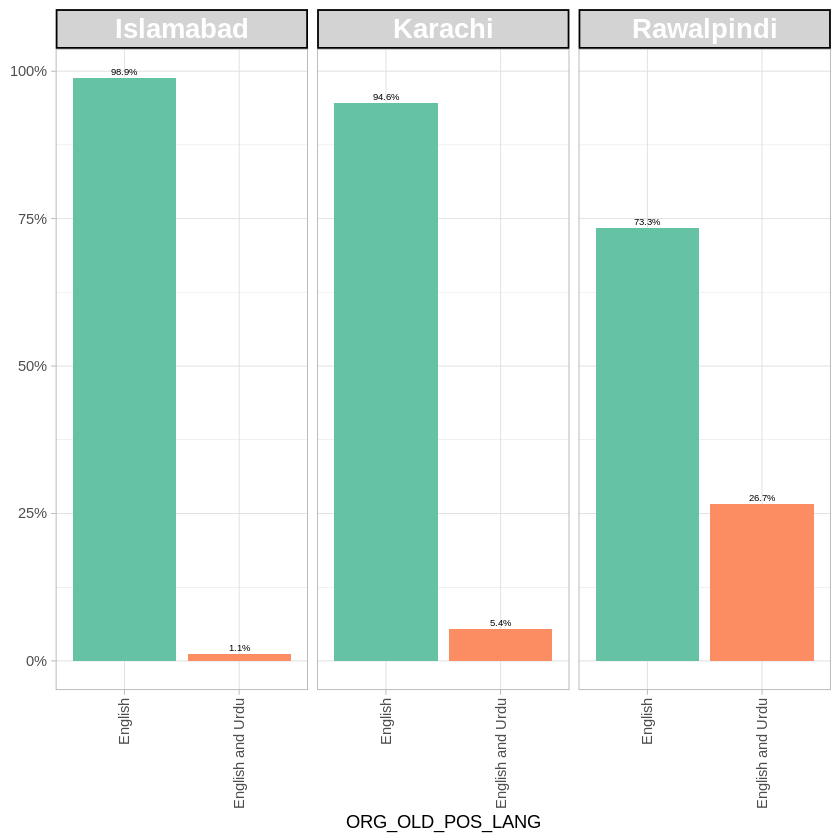

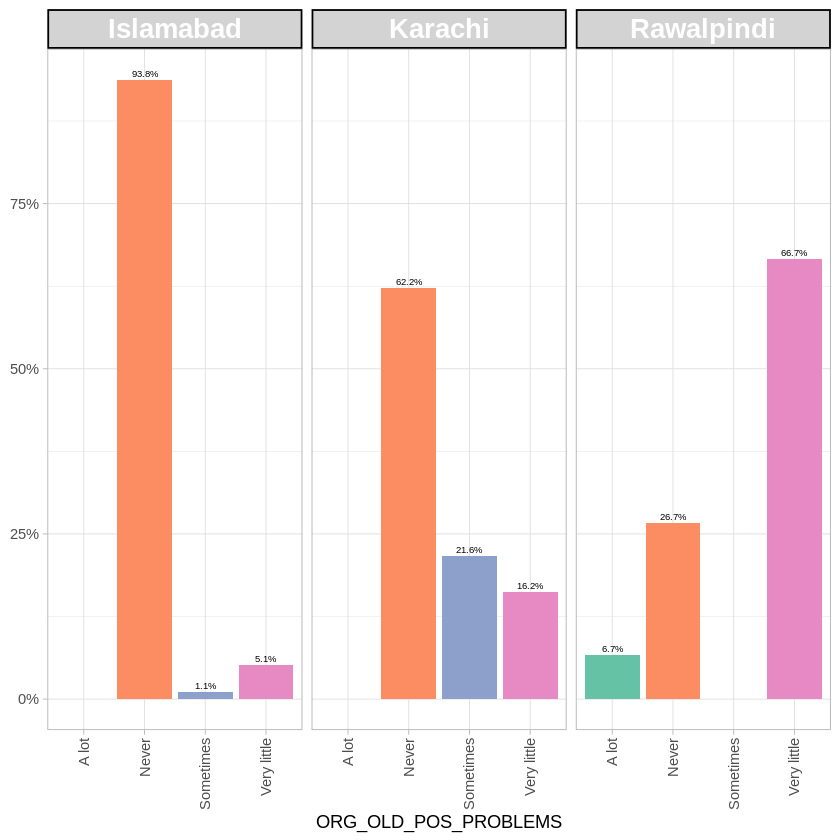

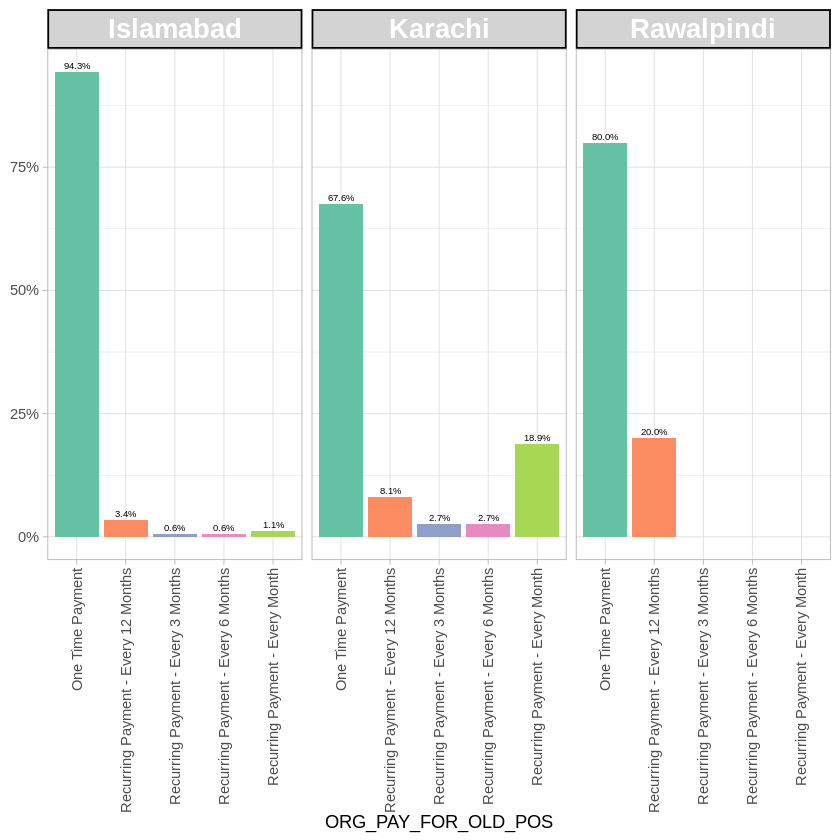

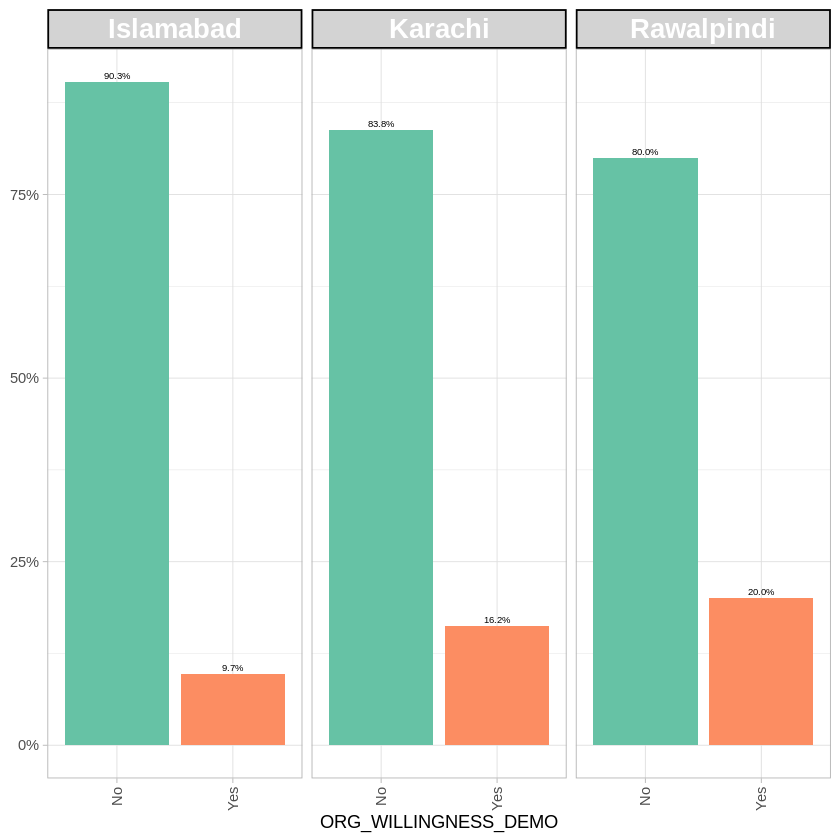

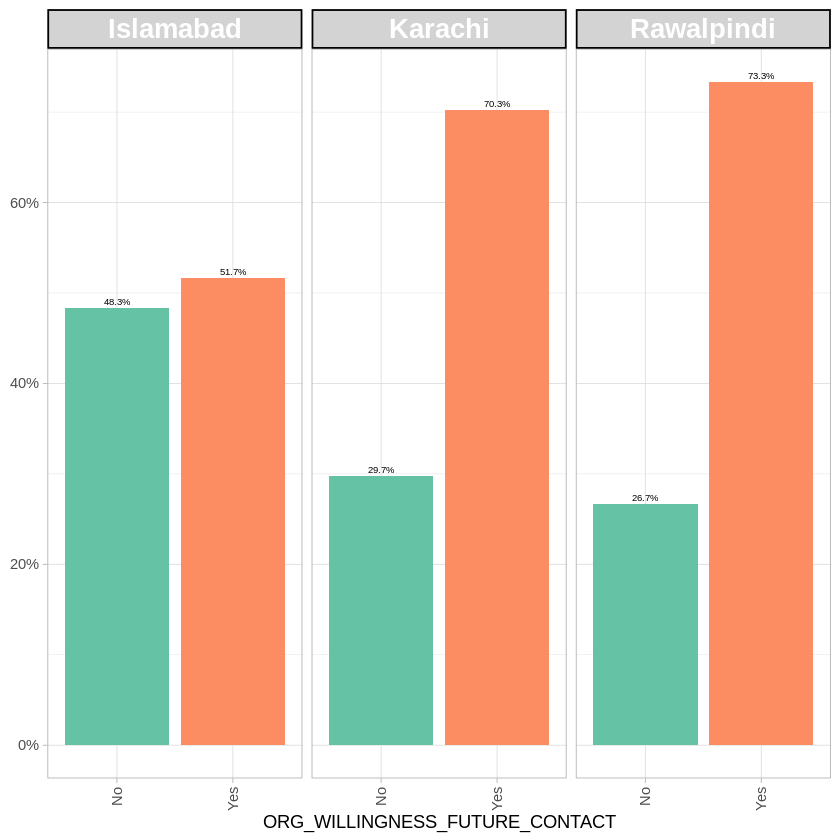

$ORG_OUTLETS_COUNT

$ORG_EMP_COUNT

$ORG_DELIVERY_SERVICE

$ORG_INTERNET_ACCESS

$ORG_INTERNET_DISRUPTION

$ORG_POS_TYPE

$ORG_OLD_POS_KIND

$ORG_OLD_POS_LANG

$ORG_OLD_POS_PROBLEMS

$ORG_PAY_FOR_OLD_POS

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT

$ORG_EMP_TRAINING

$ORG_NEW_POS_PAYMENT_PREF


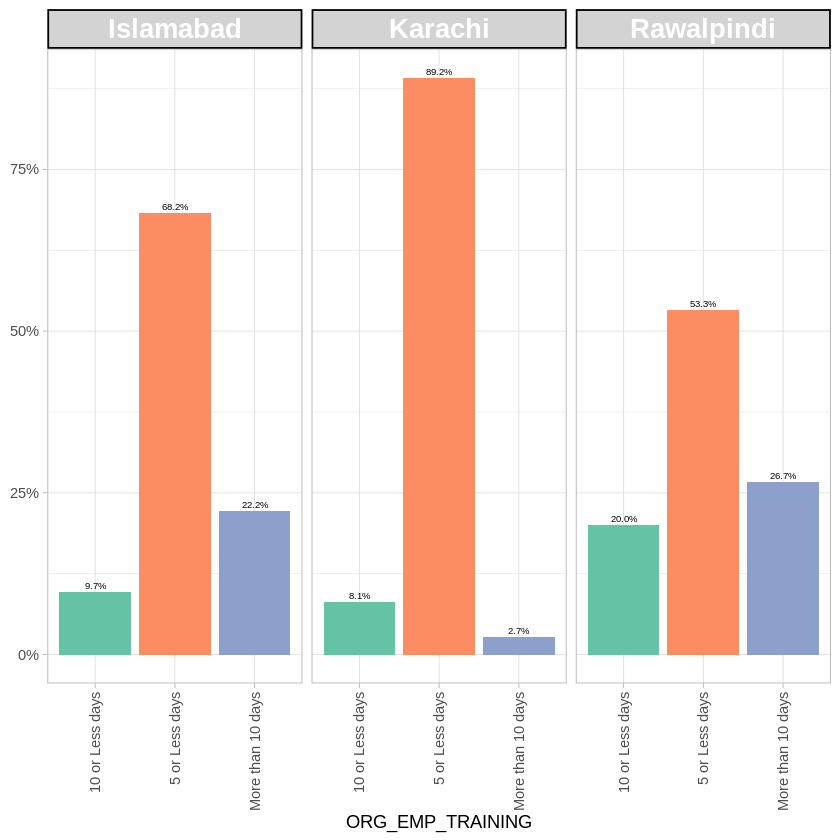

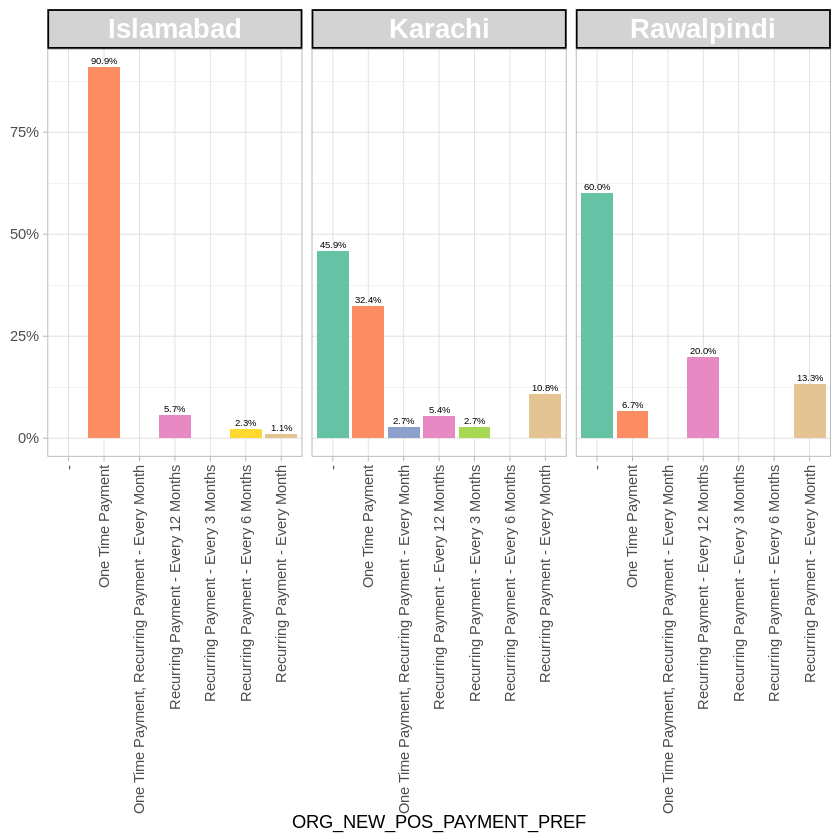

In [119]:
uni_plots

In [120]:
# SB_REGION should be plotted, without facetting
#'SB_REGION'

In [121]:
# printing the plots
pdf("all_scatterplots.pdf")
uni_plots
dev.off()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_OUTLETS_COUNT

$ORG_EMP_COUNT

$ORG_DELIVERY_SERVICE

$ORG_INTERNET_ACCESS

$ORG_INTERNET_DISRUPTION

$ORG_POS_TYPE

$ORG_OLD_POS_KIND

$ORG_OLD_POS_LANG

$ORG_OLD_POS_PROBLEMS

$ORG_PAY_FOR_OLD_POS

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT

$ORG_EMP_TRAINING

$ORG_NEW_POS_PAYMENT_PREF


png 
  2

# Dumping Data for Further Analysis

In [129]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
survey_data_file = paste ("SurveyData-", "withoutPOS-",st, ".xlsx", sep="")
print(survey_data_file)

[1] "SurveyData-withoutPOS-2021May10.xlsx"


In [130]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 1 worksheets
addWorksheet(wb, "All POS Survey")
writeData(wb, "All POS Survey", df_3)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, survey_data_file, overwrite = TRUE)

# Summary
 The above analysis is for 'With POS' ONLY

 It excludes uni-var analysis for following - (multiple choice options):

1.   ORG_TYPE
2.   ORG_DISCOUNTS_OFFERED
3.   ORG_CUSTOMER_DATA
4.   ORG_POS_FEATURES
5.   ORG_OLD_POS_PAYMENT_OPTIONS
6.   ORG_OLD_POS_DEVICES
7.   ORG_OLD_POS_URDU_FEATURES
8.   ORG_REASON_TO_REPLACE_POS
9.   ORG_WILLINGNESS_TO_PAY_AMOUNT
10.   ORG_OLD_POS_PROVIDER_PAYMENT_METHOD




## ToDO

Fix uni-var analysis

Repeat the whole process for 'Without POS'